# MACHINE LEARNING MODEL

## Importing the dataset

Here in this machine learning model we are going to predict the solubility of molecules using other features namely MolLogP
MolWt,NumRotatableBondsand its Aromatic proportion

In [1]:
##importing the necessary libraries and packages
import pandas as pd
import numpy as np

In [3]:
df=pd.read_csv("https://raw.githubusercontent.com/dataprofessor/data/master/delaney_solubility_with_descriptors.csv")

In [4]:
df

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion,logS
0,2.59540,167.850,0.0,0.000000,-2.180
1,2.37650,133.405,0.0,0.000000,-2.000
2,2.59380,167.850,1.0,0.000000,-1.740
3,2.02890,133.405,1.0,0.000000,-1.480
4,2.91890,187.375,1.0,0.000000,-3.040
...,...,...,...,...,...
1139,1.98820,287.343,8.0,0.000000,1.144
1140,3.42130,286.114,2.0,0.333333,-4.925
1141,3.60960,308.333,4.0,0.695652,-3.893
1142,2.56214,354.815,3.0,0.521739,-3.790


## Data Preprocessing

In [5]:
## Top 5 rows of the dataset
df.head()

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion,logS
0,2.5954,167.850,0.0,0.0,-2.18
1,2.3765,133.405,0.0,0.0,-2.00
2,2.5938,167.850,1.0,0.0,-1.74
3,2.0289,133.405,1.0,0.0,-1.48
4,2.9189,187.375,1.0,0.0,-3.04


In [6]:
##Bottom 5 rows of the dataset
df.tail()

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion,logS
1139,1.98820,287.343,8.0,0.000000,1.144
1140,3.42130,286.114,2.0,0.333333,-4.925
1141,3.60960,308.333,4.0,0.695652,-3.893
1142,2.56214,354.815,3.0,0.521739,-3.790
1143,2.02164,179.219,1.0,0.461538,-2.581


In [7]:
## Describe the function used to find the mean,count,standard deviation and related things
df.describe()

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion,logS
count,1144.000000,1144.000000,1144.000000,1144.000000,1144.000000
mean,2.449133,204.631675,2.173951,0.364932,-3.057997
std,1.866003,102.620500,2.627398,0.343305,2.096502
min,-7.571400,16.043000,0.000000,0.000000,-11.600000
25%,1.414900,122.126000,0.000000,0.000000,-4.332250
50%,2.340300,183.594500,1.000000,0.375000,-2.870500
75%,3.406475,270.715750,3.000000,0.666667,-1.600000
max,10.388600,780.949000,23.000000,1.000000,1.580000


In [8]:
## To find number of null values
print(df.isnull().sum())

MolLogP               0
MolWt                 0
NumRotatableBonds     0
AromaticProportion    0
logS                  0
dtype: int64


In [10]:
## Shape of dataset
df.shape

(1144, 5)

In [13]:
## Size of dataset
df.size

5720

In [11]:
### datatype of each column
df.dtypes

MolLogP               float64
MolWt                 float64
NumRotatableBonds     float64
AromaticProportion    float64
logS                  float64
dtype: object

In [12]:
## info gives count and datatype
df.info

<bound method DataFrame.info of       MolLogP    MolWt  NumRotatableBonds  AromaticProportion   logS
0     2.59540  167.850                0.0            0.000000 -2.180
1     2.37650  133.405                0.0            0.000000 -2.000
2     2.59380  167.850                1.0            0.000000 -1.740
3     2.02890  133.405                1.0            0.000000 -1.480
4     2.91890  187.375                1.0            0.000000 -3.040
...       ...      ...                ...                 ...    ...
1139  1.98820  287.343                8.0            0.000000  1.144
1140  3.42130  286.114                2.0            0.333333 -4.925
1141  3.60960  308.333                4.0            0.695652 -3.893
1142  2.56214  354.815                3.0            0.521739 -3.790
1143  2.02164  179.219                1.0            0.461538 -2.581

[1144 rows x 5 columns]>

## Splitting the dataset

Here the column of target variable i.e.,Logs is seperated from the other columns of the dataset

In [6]:
y=df['logS']
y

0      -2.180
1      -2.000
2      -1.740
3      -1.480
4      -3.040
        ...  
1139    1.144
1140   -4.925
1141   -3.893
1142   -3.790
1143   -2.581
Name: logS, Length: 1144, dtype: float64

In [10]:
x=df.drop('logS',axis=1)
x

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion
0,2.59540,167.850,0.0,0.000000
1,2.37650,133.405,0.0,0.000000
2,2.59380,167.850,1.0,0.000000
3,2.02890,133.405,1.0,0.000000
4,2.91890,187.375,1.0,0.000000
...,...,...,...,...
1139,1.98820,287.343,8.0,0.000000
1140,3.42130,286.114,2.0,0.333333
1141,3.60960,308.333,4.0,0.695652
1142,2.56214,354.815,3.0,0.521739


## Model Training

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=100)

In [13]:
x_train

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion
321,3.66202,168.239,1.0,0.923077
29,0.40510,58.080,0.0,0.000000
184,3.45664,156.228,0.0,0.833333
103,3.53290,126.243,6.0,0.000000
100,2.74800,173.171,1.0,0.769231
...,...,...,...,...
802,3.00254,250.301,1.0,0.842105
53,2.13860,82.146,3.0,0.000000
350,5.76304,256.348,0.0,0.900000
79,3.89960,186.339,10.0,0.000000


In [14]:
x_test

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion
822,2.91000,172.268,7.0,0.000000
118,7.27400,360.882,1.0,0.666667
347,1.94040,145.161,0.0,0.909091
1123,1.98640,119.378,0.0,0.000000
924,1.70062,108.140,0.0,0.750000
...,...,...,...,...
615,3.47890,170.211,2.0,0.923077
533,0.69300,210.233,0.0,0.000000
789,0.84980,196.202,2.0,0.000000
532,2.50670,96.173,0.0,0.000000


### Training using Linear Regression

In [15]:
from sklearn.linear_model import LinearRegression

In [18]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [19]:
train_pred=lr.predict(x_train)
test_pred=lr.predict(x_test)

In [20]:
print(train_pred,test_pred)

[-4.00245317 -0.41519498 -3.72702066 -3.20289543 -3.27675032 -3.46886813
 -0.67321115 -4.62946881 -2.5110779  -1.55900555  0.14421601 -2.05039413
 -2.50498916 -5.1593603  -3.80202897 -2.05682024 -3.08116871 -5.07000655
 -4.56580931 -0.55210854 -2.09185528 -0.11721804 -2.14922673 -3.89132484
 -7.87273564 -1.74523707 -3.90310729 -1.12344633 -5.37014575 -0.34901951
 -5.13203685 -6.55371601 -2.36628581 -3.65772807 -1.10518716 -1.53493312
 -1.04418844 -2.15232842 -1.34793342 -1.66679847 -5.53022761 -4.38815294
 -6.16878057 -5.75563799 -5.39898    -2.12048375 -2.39112245 -1.18186663
 -2.78393125 -2.77015555 -0.94106831 -0.03399086 -2.98975695 -3.45688571
 -3.05782288 -2.41238986 -6.52989976 -4.63819666 -3.34947999 -1.63788822
 -0.32700907 -4.91753751 -1.47150951 -2.51508498 -5.02073439 -1.11621082
 -3.60161088 -7.24646301 -0.36933702 -3.44201989 -5.61118353 -8.56776287
 -2.63090522 -1.32466397 -4.73244648 -1.91888421 -1.73951218 -2.03050854
 -6.43904334 -5.45583557 -5.53341594 -4.94567166 -1

## Model Evaluation

In [21]:
from sklearn.metrics import mean_squared_error,r2_score

In [22]:
train_mse=mean_squared_error(train_pred,y_train)
train_r2=r2_score(train_pred,y_train)
test_mse=mean_squared_error(test_pred,y_test)
test_r2=r2_score(test_pred,y_test)

In [27]:
print("MSE(Train)",train_mse)
print("R2(Train)",train_r2)
print("MSE(Test)",test_mse)
print("R2(Test)",test_r2)

MSE(Train) 1.052966730447216
R2(Train) 0.6880368313077403
MSE(Test) 0.9235637776099944
R2(Test) 0.7343490549290334


Creating this as a DataFrame will make it more tidy and hence we are proceeding with that.

In [88]:
data=['Linear Regression',train_mse,train_r2,test_mse,test_r2]

In [89]:
Y=pd.DataFrame(data).transpose()

In [90]:
Y

,0,1,2,3,4
0,Linear Regression,1.052967,0.688037,0.923564,0.734349


In [91]:
Y.columns=['Method','MSE(Train)','R2(Train)','MSE(Test)','R2(Test)']

In [92]:
Y

,Method,MSE(Train),R2(Train),MSE(Test),R2(Test)
0,Linear Regression,1.052967,0.688037,0.923564,0.734349


### Training the model using RandomForestRegressor

In [65]:
from sklearn.ensemble import RandomForestRegressor

In [66]:
rf=RandomForestRegressor(max_depth=2,random_state=100)
rf.fit(x_train,y_train)

RandomForestRegressor(max_depth=2, random_state=100)

In [67]:
rf_train_pred=rf.predict(x_train)
rf_test_pred=rf.predict(x_test)

## Model Evaluation

In [69]:
rf_train_mse=mean_squared_error(rf_train_pred,y_train)
rf_train_r2=r2_score(rf_train_pred,y_train)
rf_test_mse=mean_squared_error(rf_test_pred,y_test)
rf_test_r2=r2_score(rf_test_pred,y_test)

In [93]:
data2=['Random Forest',rf_train_mse,rf_train_r2,rf_test_mse,rf_test_r2]
Y1=pd.DataFrame(data2).transpose()

In [94]:
Y1

,0,1,2,3,4
0,Random Forest,1.031947,0.668339,1.204209,0.624672


In [95]:
Y1.columns=['Method','MSE(Train)','R2(Train)','MSE(Test)','R2(Test)']

In [96]:
Y1

,Method,MSE(Train),R2(Train),MSE(Test),R2(Test)
0,Random Forest,1.031947,0.668339,1.204209,0.624672


## Model Comparison

In [97]:
models=pd.concat([Y,Y1],axis=0)

In [99]:
models.reset_index(drop=True)

,Method,MSE(Train),R2(Train),MSE(Test),R2(Test)
0,Linear Regression,1.052967,0.688037,0.923564,0.734349
1,Random Forest,1.031947,0.668339,1.204209,0.624672


## Data Visualization

In [100]:
import matplotlib.pyplot as plt

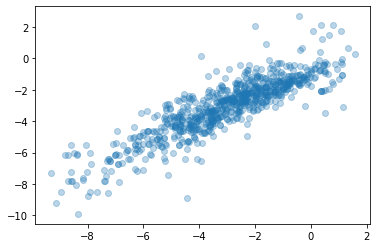

In [102]:
plt.scatter(x=y_train,y=train_pred,alpha=0.3)

#### Creating a Trendline

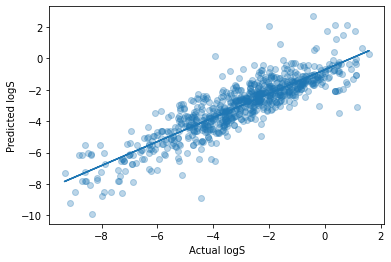

In [111]:
import numpy as np
plt.xlabel('Actual logS')
plt.ylabel('Predicted logS')
plt.scatter(x=y_train,y=train_pred,alpha=0.3)
z=np.polyfit(y_train,train_pred,1)
p=np.poly1d(z)
plt.plot(y_train,p(y_train))